In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

/Users/kishan/Desktop/python/env/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df_customers = pd.read_csv('Customers.csv')
df_transactions = pd.read_csv('Transactions.csv')
df = pd.merge(df_transactions, df_customers, on='CustomerID', how='inner')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [5]:
df.shape

(1000, 10)

In [6]:
# Aggregate transaction-level data at the customer level
customer_features = df.groupby('CustomerID').agg(
    Total_Transactions=('TransactionID', 'count'),
    Total_Spent=('TotalValue', 'sum'),
    Avg_Purchase_Value=('TotalValue', 'mean')
).reset_index()

print(customer_features.head())


  CustomerID  Total_Transactions  Total_Spent  Avg_Purchase_Value
0      C0001                   5      3354.52             670.904
1      C0002                   4      1862.74             465.685
2      C0003                   4      2725.38             681.345
3      C0004                   8      5354.88             669.360
4      C0005                   3      2034.24             678.080


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
customer_features[['Total_Transactions', 'Total_Spent', 'Avg_Purchase_Value']] = scaler.fit_transform(
    customer_features[['Total_Transactions', 'Total_Spent', 'Avg_Purchase_Value']]
)

print(customer_features.head())


  CustomerID  Total_Transactions  Total_Spent  Avg_Purchase_Value
0      C0001                 0.4     0.308942            0.474336
1      C0002                 0.3     0.168095            0.308940
2      C0003                 0.3     0.249541            0.482751
3      C0004                 0.7     0.497806            0.473092
4      C0005                 0.2     0.184287            0.480120


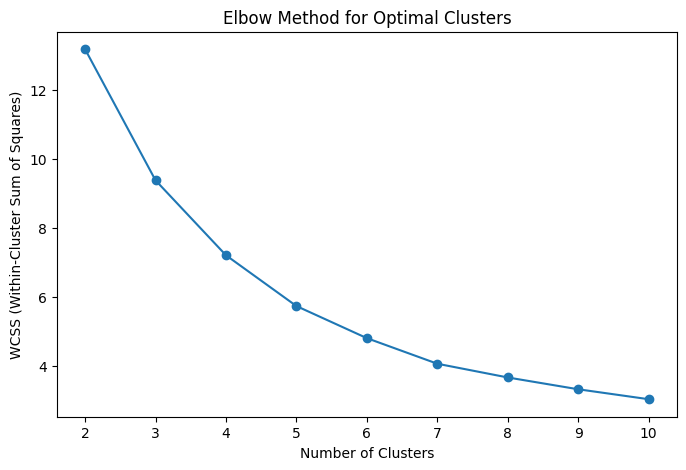

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Find the optimal number of clusters using the elbow method
wcss = []
for k in range(2, 11):  # Choosing between 2 and 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_features[['Total_Transactions', 'Total_Spent', 'Avg_Purchase_Value']])
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [24]:
# Apply K-Means with the optimal number of clusters (change k accordingly)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(customer_features[['Total_Transactions', 'Total_Spent', 'Avg_Purchase_Value']])

# Display clustered data
print(customer_features.head())


  CustomerID  Total_Transactions  Total_Spent  Avg_Purchase_Value  Cluster
0      C0001                 0.4     0.308942            0.474336        1
1      C0002                 0.3     0.168095            0.308940        1
2      C0003                 0.3     0.249541            0.482751        1
3      C0004                 0.7     0.497806            0.473092        0
4      C0005                 0.2     0.184287            0.480120        1


In [25]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(customer_features[['Total_Transactions', 'Total_Spent', 'Avg_Purchase_Value']], customer_features['Cluster'])
print(f"DB-Index: {db_index:.4f}")


DB-Index: 0.9622


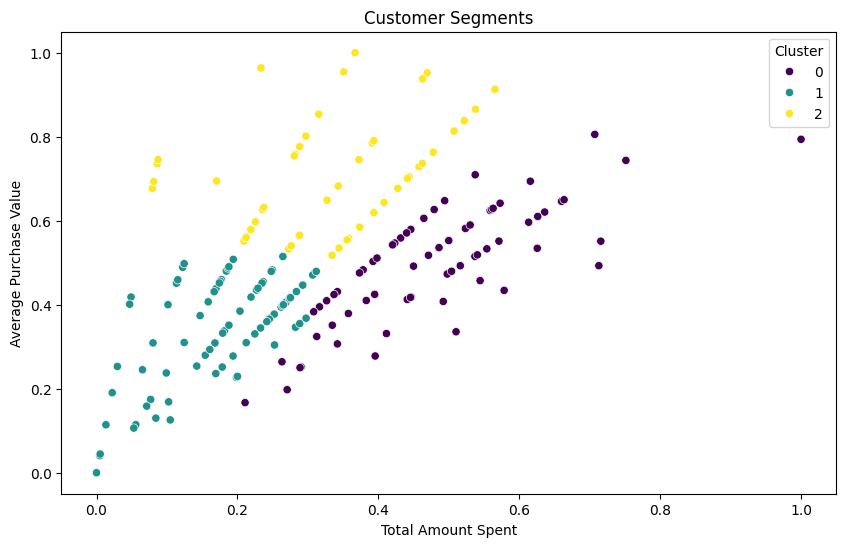

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features['Total_Spent'], y=customer_features['Avg_Purchase_Value'], hue=customer_features['Cluster'], palette='viridis')
plt.xlabel("Total Amount Spent")
plt.ylabel("Average Purchase Value")
plt.title("Customer Segments")
plt.legend(title="Cluster")
plt.show()
